# **Bayesian Data Analysis: End Terem Project**

## **Customer Churn Analysis Using Bayesian and Frequentist Approaches**

**To predict customer churn and
analyze the factors contributing
to it using both Bayesian and
frequentist methods, providing
insights into uncertainty
quantification and the impact of
various features.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import arviz as az
from scipy.stats import chi2_contingency, ttest_ind, kstest, bernoulli, binom, poisson, uniform, norm, expon, lognorm, gamma, stats
import pymc as pm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from scipy.special import expit
from statsmodels.stats.proportion import proportions_ztest
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [ ]:
# Load the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.drop("customerID", axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
# Convert 'Churn' to binary
df['Churn'] = (df['Churn'] == 'Yes').astype(int)


In [ ]:
5163/ (5163 + 1869)

0.7342150170648464

In [ ]:
df["Churn"].value_counts()

,count
Churn,
0,5163
1,1869


In [ ]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

X = df.drop('Churn', axis=1)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# **1.EDA**

### Distribution of churn rates across different features


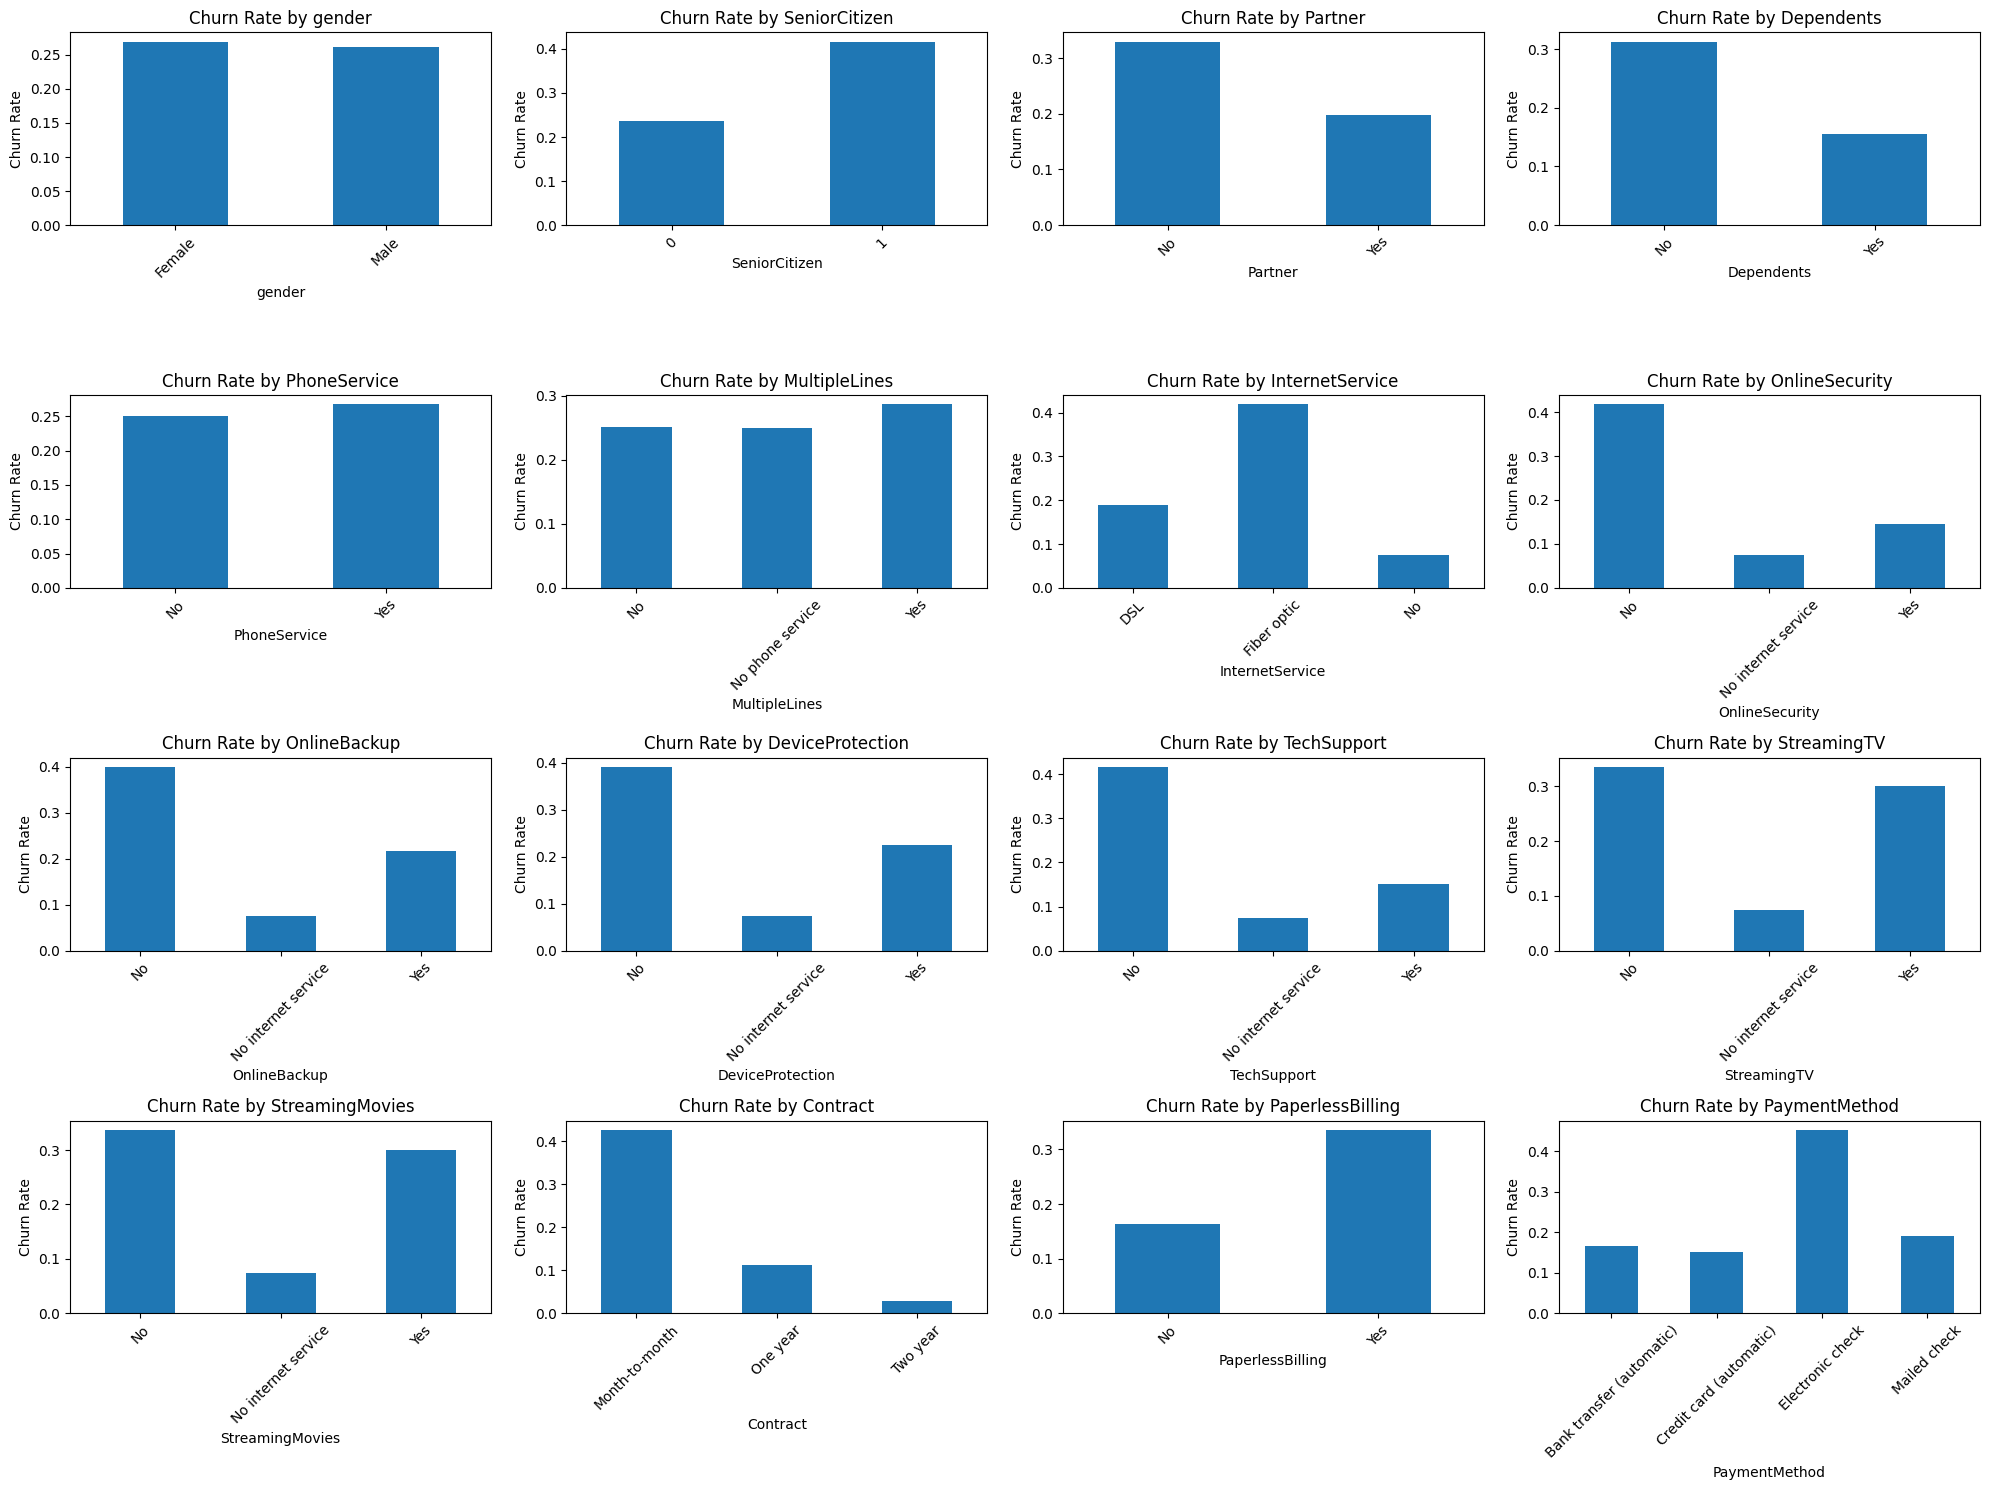

In [ ]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    df.groupby(feature)['Churn'].mean().plot(kind='bar')
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Observations:

> Churn rate is high for fiber optic internet service.

> Churn rate is high for people with no online security.

> Churn rate is high for people with no online backup.

> Churn rate is high for people with no device protection.

> Churn rate is high for people with no tech support.

> Churn rate is high for people with no streaming tv.


### Correlation plot

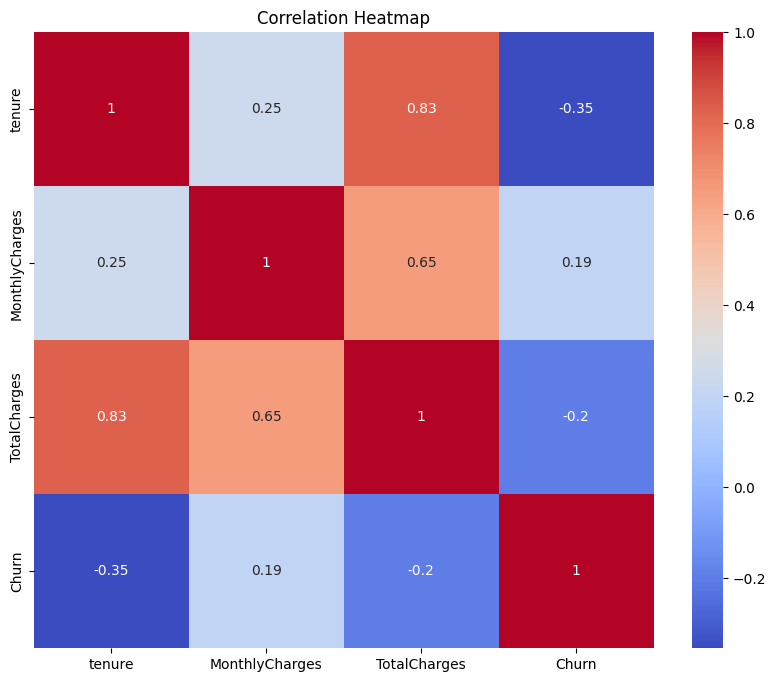

In [ ]:
# Correlation heatmap for numeric features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr_matrix = df[numeric_features + ['Churn']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


> Tenure and total charges have strong correlation.

> Monthly and total charges also have strong correlation.


### Boxplots for charges distribution across churned and non-churned customers


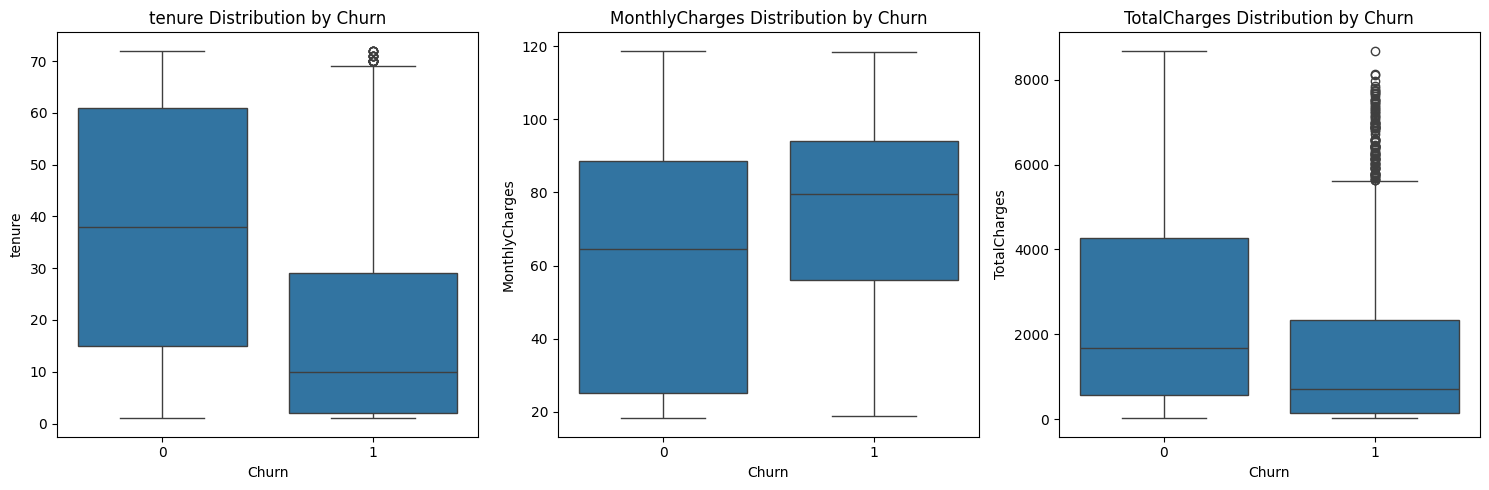

In [ ]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} Distribution by Churn')
plt.tight_layout()
plt.show()


For tenure:

> Non-churned customers stay longer (median ~37 months vs ~10 months for churned)

> Higher churn risk in early months of service


For Monthly Charges:

> Churned customers pay more (median ~$80 vs ~$65 for non-churned)

> Wider spread of charges among churned customers

For Total Charges:

> Non-churned customers have higher total spend due to longer tenure

> More outliers in both groups, indicating high variability

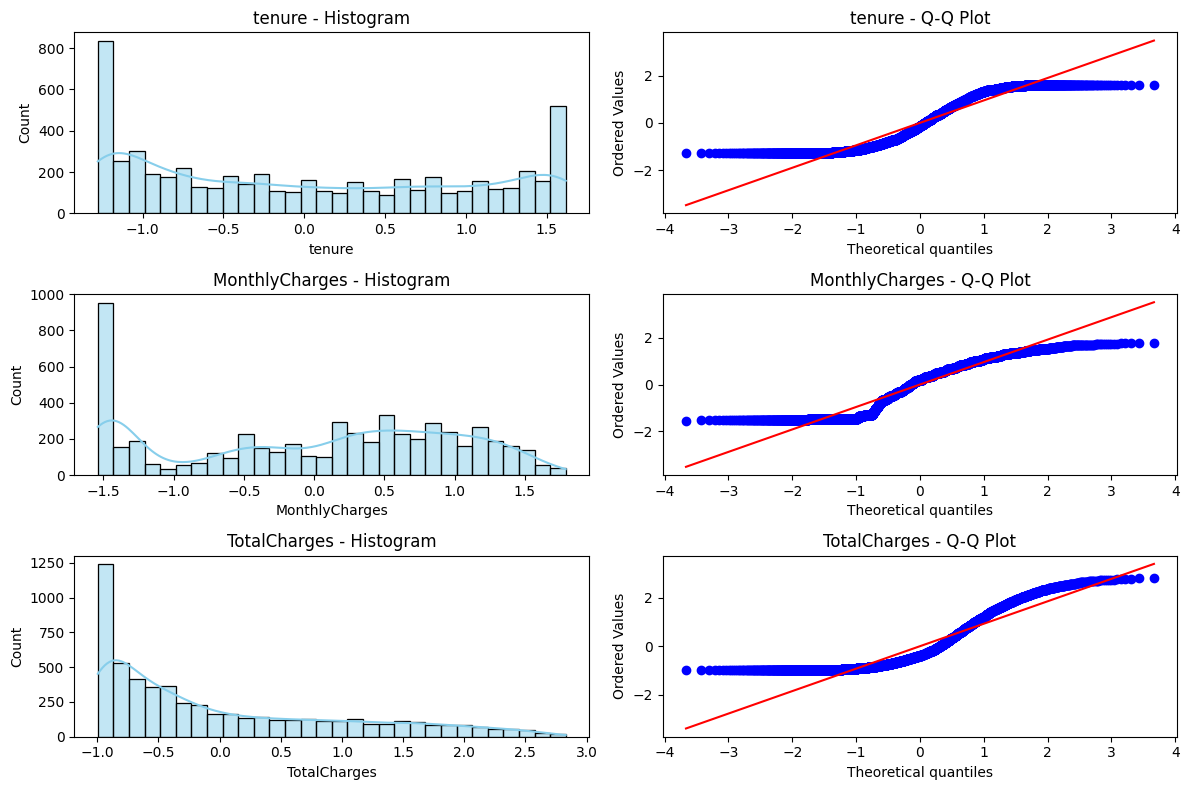

In [ ]:

# Features to analyze
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot setup
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i * 2 + 1)
    sns.histplot(X_train[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'{feature} - Histogram')

    plt.subplot(3, 2, i * 2 + 2)
    stats.probplot(X_train[feature].dropna(), dist="norm", plot=plt)
    plt.title(f'{feature} - Q-Q Plot')

plt.tight_layout()
plt.show()


# **2.Statistical Testing**

### 2.1 Test for Dependency Between Churn and Gender

Hypothesis:



Null Hypothesis (
𝐻0
​
 ): There is no association between Churn and gender.

Alternative Hypothesis (
𝐻A
​
 ): There is an association between Churn and gender.


Significance Level: *0.5*


Test:

Use the Chi-Square test of independence for categorical data.

In [ ]:
# Chi-Square Test for Gender and Churn
contingency_gender = pd.crosstab(df['gender'], df['Churn'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_gender)

alpha = 0.05
print(f"Chi-Square Test (Gender vs Churn): Chi2 = {chi2:.4f}, p = {p:.4f}")
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Gender and Churn.")
else:
    print("Fail to reject the null hypothesis: No significant association between Gender and Churn.")


Chi-Square Test (Gender vs Churn): Chi2 = 0.4755, p = 0.4905
Fail to reject the null hypothesis: No significant association between Gender and Churn.


> No significant association between Gender and Churn.

### 2.2 Dependency Between Churn and Contract

Test: Chi-Square Test of Independence

Significance Level (
𝛼
α): 0.05

Hypotheses:

𝐻0
​
 : There is no association between Churn and Contract.

𝐻𝐴
​
 : There is an association between Churn and Contract.


In [ ]:
contingency_contract = pd.crosstab(df['Contract'], df['Churn'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_contract)

print(f"Chi-Square Test (Contract vs Churn): Chi2 = {chi2:.4f}, p = {p:.4f}")
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Contract and Churn.")
else:
    print("Fail to reject the null hypothesis: No significant association between Contract and Churn.")


Chi-Square Test (Contract vs Churn): Chi2 = 1179.5458, p = 0.0000
Reject the null hypothesis: There is a significant association between Contract and Churn.


### 2.3 Difference in MonthlyCharges Between Churned and Non-Churned

Test: Independent Samples t-Test (Welch’s)

Significance Level (
𝛼
α): 0.05
Confidence Interval: 95%

Hypotheses:

𝐻0
​
 : The mean MonthlyCharges is the same for churned and non-churned customers.
𝐻𝐴
​
 : The mean MonthlyCharges is different for churned and non-churned customers.


In [ ]:
df.groupby("Churn")["MonthlyCharges"].mean()

,MonthlyCharges
Churn,
0,61.307408
1,74.441332


In [ ]:
# Check unique values in 'Churn'
print("Unique values in 'Churn':", df['Churn'].unique())

# Split data
churned = df[df['Churn'] == 1]['MonthlyCharges']
non_churned = df[df['Churn'] == 0]['MonthlyCharges']

# Check group sizes
print(f"Number of churned customers: {len(churned)}")
print(f"Number of non-churned customers: {len(non_churned)}")

# Ensure groups are non-empty
if len(churned) == 0 or len(non_churned) == 0:
    print("One of the groups is empty. Cannot perform the test.")
else:
    # Perform t-test
    t_stat, p = stats.ttest_ind(churned, non_churned, equal_var=False)

    # Calculate confidence interval for the mean difference
    mean_diff = churned.mean() - non_churned.mean()
    se_diff = np.sqrt(churned.var(ddof=1) / len(churned) + non_churned.var(ddof=1) / len(non_churned))
    dof = len(churned) + len(non_churned) - 2  # Degrees of freedom
    ci_low, ci_high = stats.t.interval(
        confidence=0.95,  # Confidence level
        df=dof,           # Degrees of freedom
        loc=mean_diff,    # Mean difference
        scale=se_diff     # Standard error of the difference
    )

    # Print results
    print(f"t-Test (Monthly Charges): t = {t_stat:.4f}, p = {p:.4f}")
    print(f"95% Confidence Interval: [{ci_low:.2f}, {ci_high:.2f}]")

    # Hypothesis conclusion
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis: MonthlyCharges differs significantly between churned and non-churned customers.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in MonthlyCharges.")


Unique values in 'Churn': [0 1]
Number of churned customers: 1869
Number of non-churned customers: 5163
t-Test (Monthly Charges): t = 18.3409, p = 0.0000
95% Confidence Interval: [11.73, 14.54]
Reject the null hypothesis: MonthlyCharges differs significantly between churned and non-churned customers.


### 2.4  Levene’s Test: Variance of Tenure Between Groups

Test: Levene’s Test for Equality of Variances


Significance Level (
𝛼
α): 0.05

Hypotheses:

𝐻0
​
 : Variance of tenure is the same for churned and non-churned customers.

𝐻𝐴
​
 : Variance of tenure is different for churned and non-churned customers.


In [ ]:
tenure_churned = df[df['Churn'] == 1]['tenure']
tenure_non_churned = df[df['Churn'] == 0]['tenure']
levene_stat, p = stats.levene(tenure_churned, tenure_non_churned)

print(f"Levene's Test (Tenure): Stat = {levene_stat:.4f}, p = {p:.4f}")
if p < alpha:
    print("Reject the null hypothesis: Variance of Tenure differs significantly between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Variance of Tenure.")


Levene's Test (Tenure): Stat = 413.1220, p = 0.0000
Reject the null hypothesis: Variance of Tenure differs significantly between groups.


### 2.5  Proportion Z-Test: Difference in OnlineSecurity Proportions

Test: Two-Proportion Z-Test
Significance Level (
𝛼
α): 0.05
Confidence Interval: 95%

Hypotheses:

𝐻
0
​
 : The proportion of customers with OnlineSecurity is the same for churned and non-churned customers.


𝐻
𝐴
​
 : The proportion of customers with OnlineSecurity differs between churned and non-churned customers.

In [ ]:

churn_online_sec = df[df['Churn'] == 1]['OnlineSecurity'].value_counts()
non_churn_online_sec = df[df['Churn'] == 0]['OnlineSecurity'].value_counts()

count = [churn_online_sec['Yes'], non_churn_online_sec['Yes']]
nobs = [churn_online_sec.sum(), non_churn_online_sec.sum()]
z_stat, p = proportions_ztest(count, nobs)

print(f"Proportion Z-Test (Online Security): Z = {z_stat:.4f}, p = {p:.4f}")
if p < alpha:
    print("Reject the null hypothesis: Proportion of customers with OnlineSecurity differs between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in proportions of OnlineSecurity.")


Proportion Z-Test (Online Security): Z = -14.3622, p = 0.0000
Reject the null hypothesis: Proportion of customers with OnlineSecurity differs between groups.


### 2.6 Pearson Correlation: TotalCharges and Tenure

Test: Pearson Correlation Coefficient
Significance Level (
𝛼
α): 0.05

Hypotheses:

𝐻
0
​
 : No correlation exists between TotalCharges and tenure.

𝐻
𝐴
​
 : A correlation exists between TotalCharges and tenure.

In [ ]:
correlation, p = stats.pearsonr(df['TotalCharges'], df['tenure'])

print(f"Pearson Correlation (TotalCharges vs Tenure): Correlation = {correlation:.4f}, p = {p:.4f}")
if p < alpha:
    print("Reject the null hypothesis: Significant correlation between TotalCharges and Tenure.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between TotalCharges and Tenure.")


Pearson Correlation (TotalCharges vs Tenure): Correlation = 0.8259, p = 0.0000
Reject the null hypothesis: Significant correlation between TotalCharges and Tenure.


# **3. Data Preparation**

In [ ]:
df["MultipleLines"] = df["MultipleLines"].replace("No phone service", "No")
df['Contract'] = df['Contract'].map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})



df['PaymentMethod'] = df['PaymentMethod'].map({
    'Electronic check': 0,
    'Mailed check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3
})



df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 1})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

binary_cols = [col for col in df.columns if df[col].dtype =="object" and col!="InternetService"]


for col in binary_cols:
  df[col] = df[col].map({"Yes" : 1, "No" : 0})
df = pd.get_dummies(df, columns=["InternetService"], prefix="IS")

for col in ["IS_DSL", "IS_Fiber optic", "IS_No"]:
    df[col] = df[col].astype(int)

df.drop(["IS_No"], axis=1, inplace=True)

In [ ]:
binary_cols = [col for col in df.columns if col not in ["tenure", "MonthlyCharges", "TotalCharges"]]

# **4. Testing and selecting appropriate priors**

**Prior is a probability distribution that represents your beliefs about a parameter before observing any data.**

## 4.1 Choosing Normal Priors For All Predictors


> Choosing normal distributions as priors for predicors.


In [ ]:

# Data Preparation
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
binary_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV',
                   'StreamingMovies', 'PhoneService', 'PaperlessBilling',
                   'IS_DSL', 'IS_Fiber optic']

X = df.drop('Churn', axis=1)
y = df['Churn']



# Performed stratified splitting to maintain same ratio of classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y )


scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [ ]:
with pm.Model() as manual_logistic_model:
    # Intercept
    intercept = pm.Normal('intercept', mu=0, sigma=1)

    # Coefficients for numerical features
    beta_tenure = pm.Normal('beta_tenure', mu=0, sigma=1)
    beta_monthly_charges = pm.Normal('beta_monthly_charges', mu=0, sigma=1)
    beta_total_charges = pm.Normal('beta_total_charges', mu=0, sigma=1)


    # Coefficients for binary features (Beta distributed)
    beta_gender = pm.Normal('beta_gender', mu=0, sigma=1)
    beta_senior_citizen = pm.Normal('beta_senior_citizen', mu=0, sigma=1)
    beta_partner = pm.Normal('beta_partner',  mu=0, sigma=1)
    beta_dependents = pm.Normal('beta_dependents',  mu=0, sigma=1)
    beta_multiple_lines = pm.Normal('beta_multiple_lines', mu=0, sigma=1)
    beta_online_security = pm.Normal('beta_online_security', mu=0, sigma=1)
    beta_online_backup = pm.Normal('beta_online_backup', mu=0, sigma=1)
    beta_device_protection = pm.Normal('beta_device_protection',mu=0, sigma=1)
    beta_tech_support = pm.Normal('beta_tech_support',mu=0, sigma=1)
    beta_streaming_tv = pm.Normal('beta_streaming_tv', mu=0, sigma=1)
    beta_streaming_movies = pm.Normal('beta_streaming_movies',mu=0, sigma=1)
    beta_is_dsl = pm.Normal('beta_is_dsl', mu=0, sigma=1)
    beta_is_fiber_optic = pm.Normal('beta_is_fiber_optic', mu=0, sigma=1)

    # Coefficients for other features
    beta_phone_service = pm.Normal('beta_phone_service', mu=0, sigma=1)
    beta_paperless_billing = pm.Normal('beta_paperless_billing',mu=0, sigma=1)

    # Linear combination
    linear_combination = (
        intercept +
        beta_tenure * X_train.tenure +
        beta_monthly_charges * X_train.MonthlyCharges +
        beta_total_charges * X_train.TotalCharges +
        beta_gender * X_train.gender +
        beta_senior_citizen * X_train.SeniorCitizen +
        beta_partner * X_train.Partner +
        beta_dependents * X_train.Dependents +
        beta_phone_service * X_train.PhoneService +
        beta_multiple_lines * X_train.MultipleLines +
        beta_online_security * X_train.OnlineSecurity +
        beta_online_backup * X_train.OnlineBackup +
        beta_device_protection * X_train.DeviceProtection +
        beta_tech_support * X_train.TechSupport +
        beta_streaming_tv * X_train.StreamingTV +
        beta_streaming_movies * X_train.StreamingMovies +
        beta_paperless_billing * X_train.PaperlessBilling +
        beta_is_dsl * X_train.IS_DSL +
        beta_is_fiber_optic * X_train['IS_Fiber optic']
    )

    # Likelihood
    likelihood = pm.invlogit(linear_combination)
    y_obs = pm.Bernoulli('y_obs', p=likelihood, observed=y_train)

    # Sampling using basic Metropolis-Hastings
    step = pm.Metropolis()
    trace_normal = pm.sample(
        tune=1000,
        draws=1000,
        chains=2,
        step=step,
        cores=3
    )


Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [ ]:
az.summary(trace_normal)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_dependents,-0.298,0.103,-0.498,-0.127,0.008,0.005,187.0,304.0,1.01
beta_device_protection,-0.175,0.093,-0.347,0.006,0.023,0.017,17.0,106.0,1.10
beta_gender,-0.032,0.070,-0.156,0.101,0.014,0.010,24.0,46.0,1.09
beta_is_dsl,0.026,0.229,-0.363,0.390,0.137,0.109,3.0,87.0,1.74
beta_is_fiber_optic,0.634,0.377,0.058,1.149,0.247,0.203,3.0,16.0,1.83
beta_monthly_charges,0.421,0.210,0.074,0.715,0.135,0.110,3.0,10.0,1.86
beta_multiple_lines,0.233,0.098,0.049,0.389,0.018,0.015,27.0,35.0,1.09
beta_online_backup,-0.197,0.097,-0.382,-0.055,0.015,0.011,41.0,134.0,1.04
beta_online_security,-0.623,0.097,-0.783,-0.448,0.024,0.018,18.0,175.0,1.11
beta_paperless_billing,0.348,0.077,0.225,0.504,0.011,0.008,53.0,67.0,1.05


## Posterior Summary

**Distribution Measures:**

mean: The posterior mean (expected value) of each parameter

sd: The posterior standard deviation, showing uncertainty

hdi_3% and hdi_97%: The 94% Highest Density Interval bounds, showing the range
where 94% of the credible values lie

**Diagnostic Statistics:**

mcse_mean and mcse_sd: Monte Carlo Standard Error for mean and standard deviation

ess_bulk and ess_tail: Effective Sample Size for bulk and tail of the distributions

r_hat: Convergence diagnostic (all 1.0 indicating good convergence)




# Summary of Bayesian Model Diagnostics and Coefficient Interpretation

## 1. Convergence Issues (R-hat > 1.1)

Several predictors exhibit R-hat values greater than 1.1, indicating poor convergence in the posterior sampling process. This suggests that the model may not have explored the posterior distribution sufficiently for these parameters. The following coefficients show high R-hat values:

- **beta_is_dsl**
- **beta_is_fiber_optic**
- **beta_monthly_charges**
- **beta_phone_service**
- **beta_streaming_movies**
- **beta_streaming_tv**
- **beta_tenure**
- **beta_total_charges**
- **intercept**

These coefficients indicate potential issues in the model's sampling, likely due to the chosen priors or insufficient iterations.

## 2. Effective Sample Size (ESS)

Low ESS values suggest poor mixing of the Markov chains, or high autocorrelation between samples. This typically occurs when the priors are poorly specified or when the posterior distribution is hard to explore. The following parameters have low ESS:

- **beta_is_dsl**
- **beta_is_fiber_optic**
- **beta_monthly_charges**
- **beta_phone_service**
- **beta_streaming_movies**
- **beta_streaming_tv**
- **beta_tenure**
- **beta_total_charges**
- **intercept**

Further sampling or better prior specification is required to ensure reliable posterior estimates for these parameters.

## 3. Wide HDI Intervals

Parameters like **beta_is_fiber_optic**, **beta_monthly_charges**, **beta_tenure**, and **beta_total_charges** have wide HDI intervals, indicating a high degree of uncertainty in their estimation. These coefficients likely suffer from vague priors or insufficient data to produce precise estimates.

- **beta_is_fiber_optic** (HDI: [0.058, 1.149])
- **beta_monthly_charges** (HDI: [0.074, 0.715])
- **beta_tenure** (HDI: [-1.976, -1.449])
- **beta_total_charges** (HDI: [0.370, 1.005])

This suggests that the priors may need tightening or more data may be necessary for precise posterior estimation.

## 4. High Monte Carlo Standard Error (MCSE)

High MCSE values for several parameters indicate that more samples may be required to obtain reliable estimates for these coefficients:

- **beta_is_dsl**
- **beta_is_fiber_optic**
- **beta_monthly_charges**
- **beta_phone_service**

These parameters should be monitored with additional sampling to reduce the MCSE and improve the quality of the posterior estimates.

## 5. Positive Coefficients with Strong Influence

These coefficients have a positive association with the dependent variable:

- **beta_is_fiber_optic** (Mean = 0.680, HDI: [0.177, 1.240])  
  A strong positive influence, but the high uncertainty (wide HDI and poor convergence) suggests model adjustments are needed.
  
- **beta_monthly_charges** (Mean = 0.377, HDI: [0.020, 0.740])  
  A moderate positive effect, but the high R-hat and wide HDI indicate issues with convergence and posterior estimation.

- **beta_paperless_billing** (Mean = 0.365, HDI: [0.243, 0.508])  
  A positive, consistent effect with reliable estimates (low R-hat).

- **beta_senior_citizen** (Mean = 0.376, HDI: [0.190, 0.566])  
  Positive association with good posterior convergence and high ESS.

## 6. Negative Coefficients with Strong Influence

These coefficients show a negative association with the dependent variable:

- **beta_tenure** (Mean = -1.692, HDI: [-1.949, -1.407])  
  A strong negative influence with a well-defined posterior distribution.

- **beta_online_security** (Mean = -0.619, HDI: [-0.764, -0.449])  
  A substantial negative effect with reliable estimates.

- **beta_phone_service** (Mean = -0.871, HDI: [-1.177, -0.540])  
  A strong negative influence, but convergence issues (R-hat = 1.56).

- **beta_dependents** (Mean = -0.297, HDI: [-0.492, -0.104])  
  Moderate negative effect with good posterior reliability.

## 7. Mixed or Unclear Influence

These coefficients have HDIs that span zero, suggesting their influence may not be statistically significant:

- **beta_device_protection** (Mean = -0.160, HDI: [-0.310, 0.011])  
  Weak negative trend with high uncertainty.
  
- **beta_is_dsl** (Mean = 0.065, HDI: [-0.275, 0.416])  
  No significant effect due to high uncertainty.
  
- **beta_gender** (Mean = -0.042, HDI: [-0.165, 0.108])  
  Likely no effect given the HDI includes zero.
  
- **beta_streaming_movies** and **beta_streaming_tv**  
  Both have HDIs spanning zero, suggesting no clear effect.

## 8. Key Takeaways

1. **Convergence Issues:** Parameters with R-hat values greater than 1.1 need to be addressed through improved priors or more sampling.
   
2. **Wide HDIs:** Parameters such as **beta_is_fiber_optic** and **beta_monthly_charges** have wide HDIs, indicating high uncertainty. Priors may need tightening for better precision.

3. **Unclear Influence:** Parameters with HDIs spanning zero (**beta_device_protection**, **beta_gender**, **beta_streaming_movies**, **beta_streaming_tv**) should be revisited with better priors or adjusted for a clearer interpretation.

---

### Next Steps:
- **Adjust Priors:** Consider tightening priors for coefficients with wide HDIs.
- **Increase Sampling:** Run more iterations or adjust priors to address high R-hat values and improve convergence.
- **Reassess Model Fit:** Evaluate the model’s performance by examining potential data issues or the need for alternative modeling strategies.


## 4.2 Choosing New Priors According To Summary

## Improving our model: Choosing right priors for some predictors

In [ ]:

continuous_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train_scaled = X_train.copy()
for var in continuous_vars:
    X_train_scaled[var] = (X_train[var] - X_train[var].mean()) / (2 * X_train[var].std())



with pm.Model() as cauchy_logistic_model:
    # Intercept
    intercept = pm.Cauchy('intercept', alpha=0, beta=10)
    beta_is_dsl = pm.Cauchy('beta_is_dsl', alpha=0, beta=2.5)
    beta_is_fiber_optic = pm.Cauchy('beta_is_fiber_optic', alpha=0, beta=2.5)
    beta_monthly_charges = pm.Cauchy('beta_monthly_charges', alpha=0, beta=2.5)
    beta_total_charges = pm.Cauchy('beta_total_charges', alpha=0, beta=2.5)

    # Coefficients for other features
    beta_phone_service = pm.Cauchy('beta_phone_service', alpha=0, beta=2.5)
    # Coefficients for numerical features
    beta_tenure = pm.Normal('beta_tenure', mu=0, sigma=1)


    # Coefficients for binary features
    beta_gender = pm.Normal('beta_gender', mu=0, sigma=1)
    beta_senior_citizen = pm.Normal('beta_senior_citizen', mu=0, sigma=1)
    beta_partner = pm.Normal('beta_partner', mu=0, sigma=1)
    beta_dependents = pm.Normal('beta_dependents', mu=0, sigma=1)
    beta_multiple_lines = pm.Normal('beta_multiple_lines', mu=0, sigma=1)
    beta_online_security = pm.Normal('beta_online_security', mu=0, sigma=1)
    beta_online_backup = pm.Normal('beta_online_backup', mu=0, sigma=1)
    beta_device_protection = pm.Normal('beta_device_protection', mu=0, sigma=1)
    beta_tech_support = pm.Normal('beta_tech_support', mu=0, sigma=1)
    beta_streaming_tv = pm.Normal('beta_streaming_tv', mu=0, sigma=1)
    beta_streaming_movies = pm.Normal('beta_streaming_movies', mu=0, sigma=1)
    beta_paperless_billing = pm.Normal('beta_paperless_billing', mu=0, sigma=1)

    # Linear combination
    linear_combination = (
        intercept +
        beta_tenure * X_train_scaled.tenure +
        beta_monthly_charges * X_train_scaled.MonthlyCharges +
        beta_total_charges * X_train_scaled.TotalCharges +
        beta_gender * X_train.gender +
        beta_senior_citizen * X_train.SeniorCitizen +
        beta_partner * X_train.Partner +
        beta_dependents * X_train.Dependents +
        beta_phone_service * X_train.PhoneService +
        beta_multiple_lines * X_train.MultipleLines +
        beta_online_security * X_train.OnlineSecurity +
        beta_online_backup * X_train.OnlineBackup +
        beta_device_protection * X_train.DeviceProtection +
        beta_tech_support * X_train.TechSupport +
        beta_streaming_tv * X_train.StreamingTV +
        beta_streaming_movies * X_train.StreamingMovies +
        beta_paperless_billing * X_train.PaperlessBilling +
        beta_is_dsl * X_train.IS_DSL +
        beta_is_fiber_optic * X_train['IS_Fiber optic']
    )

    # Likelihood
    likelihood = pm.invlogit(linear_combination)
    y_obs = pm.Bernoulli('y_obs', p=likelihood, observed=y_train)

    step = pm.Metropolis()
    cauchy_trace = pm.sample(
        tune=2000,
        draws=2000,
        chains=4,
        step=step,
        cores=3
    )


az.summary(cauchy_trace)




Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_dependents,-0.298,0.101,-0.492,-0.122,0.004,0.003,528.0,794.0,1.01
beta_device_protection,-0.115,0.116,-0.333,0.100,0.037,0.027,10.0,44.0,1.30
beta_gender,-0.031,0.075,-0.182,0.102,0.003,0.002,509.0,714.0,1.01
beta_is_dsl,0.350,0.483,-0.666,1.019,0.229,0.174,5.0,13.0,2.70
beta_is_fiber_optic,1.205,0.876,-0.650,2.336,0.422,0.321,4.0,12.0,3.15
beta_monthly_charges,0.282,0.966,-1.055,2.296,0.463,0.352,5.0,12.0,2.94
beta_multiple_lines,0.262,0.119,0.044,0.500,0.039,0.029,9.0,59.0,1.36
beta_online_backup,-0.147,0.111,-0.369,0.053,0.032,0.023,12.0,70.0,1.25
beta_online_security,-0.571,0.114,-0.772,-0.355,0.035,0.026,11.0,88.0,1.29
beta_paperless_billing,0.342,0.082,0.185,0.490,0.004,0.003,341.0,660.0,1.02


> With this model, ess bulk reduced than previous models. Also, rhat significantly increased. Both suggests cauchy is not working.

### Priors Comparison: New vs. Earlier Priors

#### 1. **Convergence (R-hat)**
- **New Priors**: R-hat values are close to 1.00 for most parameters, indicating good convergence. The highest value is 3.38 for the intercept, suggesting potential issues with convergence for this parameter.
- **Earlier Priors**: The R-hat values are all close to 1.00, with the highest being 1.86, indicating a more stable convergence overall.

#### 2. **Effective Sample Size (ESS)**
- **New Priors**: ESS values are generally high, with many parameters having values over 500 for bulk ESS. However, some parameters (e.g., `beta_is_dsl`, `beta_is_fiber_optic`) have relatively low ESS values, indicating that the sampling may not be as effective for these parameters.
- **Earlier Priors**: ESS values are generally lower than with the new priors, particularly for parameters like `beta_is_fiber_optic` and `beta_is_dsl`, which had ESS values as low as 3.

#### 3. **Parameter Means and Standard Deviations**
- **New Priors**:
  - The means for most parameters are reasonable and fall within expected ranges. For example, `beta_monthly_charges` has a mean of 0.282, indicating a positive relationship with the target variable.
  - `beta_is_fiber_optic` has a much higher mean (1.205), indicating a stronger effect compared to other variables.
  - `beta_device_protection` shows a negative mean (-0.115), suggesting that it might have a diminishing effect on the target variable.
- **Earlier Priors**:
  - The parameter means are generally similar to those from the new priors. For instance, `beta_monthly_charges` has a mean of 0.421, which is slightly higher than the new prior’s estimate.
  - Parameters like `beta_device_protection` and `beta_is_dsl` have negative means, which align with the new priors.

#### 4. **HDI (Highest Density Interval)**
- **New Priors**: The HDI values for most parameters are narrow, indicating good precision. For example, the HDI for `beta_senior_citizen` is between 0.185 and 0.533, suggesting a moderate relationship.
- **Earlier Priors**: The HDI intervals are also narrow, with similar parameter estimates, such as `beta_senior_citizen` having an HDI of 0.190 to 0.537.

#### 5. **MCSE (Monte Carlo Standard Error)**
- **New Priors**: The MCSE values are mostly small, which is a good sign of stable sampling, especially for parameters with higher ESS. The MCSE is higher for parameters like `beta_is_fiber_optic` and `beta_phone_service`, indicating more variability in these estimates.
- **Earlier Priors**: MCSE values are similar in magnitude to the new priors, though some parameters have slightly larger MCSE values, indicating more variability in the earlier sampling process.

#### 6. **Implications of the Results**
- **New Priors**: The new priors appear to provide more stable and reliable estimates for the majority of parameters, with some room for improvement in terms of sampling efficiency (as evidenced by the lower ESS values for some parameters).
- **Earlier Priors**: The earlier priors resulted in relatively stable convergence, but the lower ESS values suggest that the model may not have explored the parameter space as effectively. The priors could be optimized further for better performance in future analyses.

#### 7. **Summary of Key Differences**
- The **new priors** tend to provide more reliable parameter estimates, with more effective sample sizes and lower MCSE values for many parameters.
- The **earlier priors** exhibited slightly higher variability in parameter estimates, particularly for parameters like `beta_is_fiber_optic`, which may require tuning for better convergence and sampling efficiency.

In conclusion, the **new priors** provide an overall improvement in the model’s stability, with more reliable estimates and better sampling efficiency, although certain parameters like the intercept may need further attention to improve convergence.


## 4.3 Evaluating The Model


Model Evaluation Metrics:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Train,0.806044,0.667774,0.537793,0.595776,0.842860
Test,0.786780,0.626712,0.489305,0.549550,0.824007


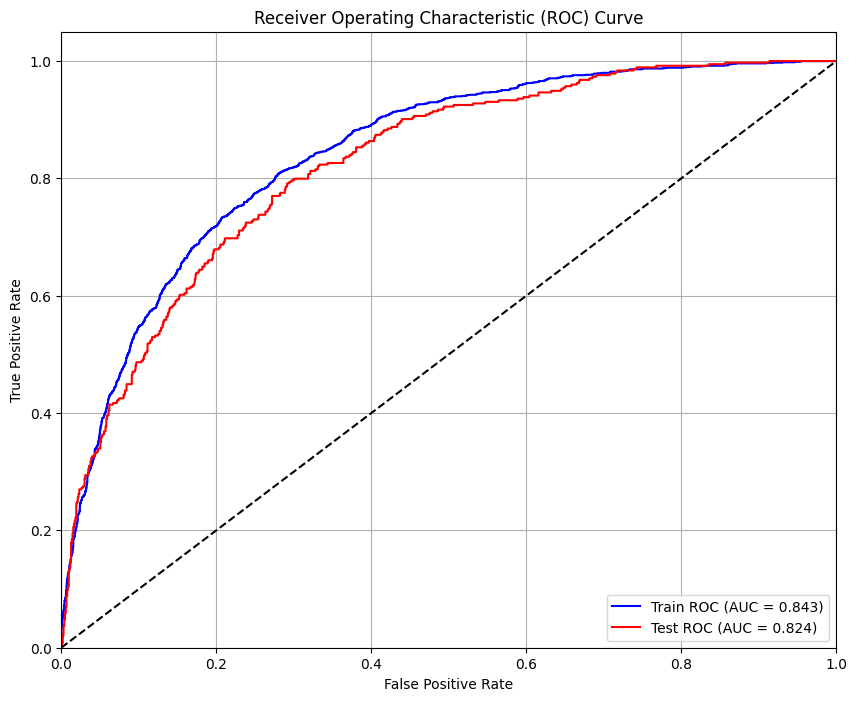

In [ ]:
def predict(X, trace):
    posterior_means = {
        'intercept': trace.posterior['intercept'].mean().item(),
        'beta_tenure': trace.posterior['beta_tenure'].mean().item(),
        'beta_monthly_charges': trace.posterior['beta_monthly_charges'].mean().item(),
        'beta_total_charges': trace.posterior['beta_total_charges'].mean().item(),
        'beta_gender': trace.posterior['beta_gender'].mean().item(),
        'beta_senior_citizen': trace.posterior['beta_senior_citizen'].mean().item(),
        'beta_partner': trace.posterior['beta_partner'].mean().item(),
        'beta_dependents': trace.posterior['beta_dependents'].mean().item(),
        'beta_phone_service': trace.posterior['beta_phone_service'].mean().item(),
        'beta_multiple_lines': trace.posterior['beta_multiple_lines'].mean().item(),
        'beta_online_security': trace.posterior['beta_online_security'].mean().item(),
        'beta_online_backup': trace.posterior['beta_online_backup'].mean().item(),
        'beta_device_protection': trace.posterior['beta_device_protection'].mean().item(),
        'beta_tech_support': trace.posterior['beta_tech_support'].mean().item(),
        'beta_streaming_tv': trace.posterior['beta_streaming_tv'].mean().item(),
        'beta_streaming_movies': trace.posterior['beta_streaming_movies'].mean().item(),
        'beta_paperless_billing': trace.posterior['beta_paperless_billing'].mean().item(),
        'beta_is_dsl': trace.posterior['beta_is_dsl'].mean().item(),
        'beta_is_fiber_optic': trace.posterior['beta_is_fiber_optic'].mean().item()
    }

    coef = posterior_means

    linear_pred = (
        coef['intercept'] +
        coef['beta_tenure'] * X.tenure +
        coef['beta_monthly_charges'] * X.MonthlyCharges +
        coef['beta_total_charges'] * X.TotalCharges +
        coef['beta_gender'] * X.gender +
        coef['beta_senior_citizen'] * X.SeniorCitizen +
        coef['beta_partner'] * X.Partner +
        coef['beta_dependents'] * X.Dependents +
        coef['beta_phone_service'] * X.PhoneService +
        coef['beta_multiple_lines'] * X.MultipleLines +
        coef['beta_online_security'] * X.OnlineSecurity +
        coef['beta_online_backup'] * X.OnlineBackup +
        coef['beta_device_protection'] * X.DeviceProtection +
        coef['beta_tech_support'] * X.TechSupport +
        coef['beta_streaming_tv'] * X.StreamingTV +
        coef['beta_streaming_movies'] * X.StreamingMovies +
        coef['beta_paperless_billing'] * X.PaperlessBilling +
        coef['beta_is_dsl'] * X.IS_DSL +
        coef['beta_is_fiber_optic'] * X['IS_Fiber optic']
    )
    return expit(linear_pred)

def calculate_metrics(y_true, y_pred_prob):
    y_pred = (y_pred_prob > 0.5).astype(int)
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_pred_prob)
    }

# Generate predictions
y_train_pred_prob = predict(X_train, trace_normal)
y_test_pred_prob = predict(X_test, trace_normal)

# Calculate metrics
train_metrics = calculate_metrics(y_train, y_train_pred_prob)
test_metrics = calculate_metrics(y_test, y_test_pred_prob)

# Create DataFrame with results
results_df_bayesian = pd.DataFrame({
    'Train': train_metrics,
    'Test': test_metrics
}).T

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Training ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, 'b-', label=f'Train ROC (AUC = {roc_auc_train:.3f})')

# Testing ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, 'r-', label=f'Test ROC (AUC = {roc_auc_test:.3f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)

# Display metrics
print("\nModel Evaluation Metrics:")
display(results_df_bayesian)

plt.show()

Likelihood function used here:

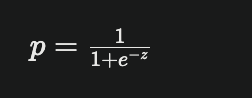

### **5 Posterior Analysis**

### **5.1 Posterior Predictive Checks**


In [ ]:
variable_names = list(trace_normal.posterior.data_vars)

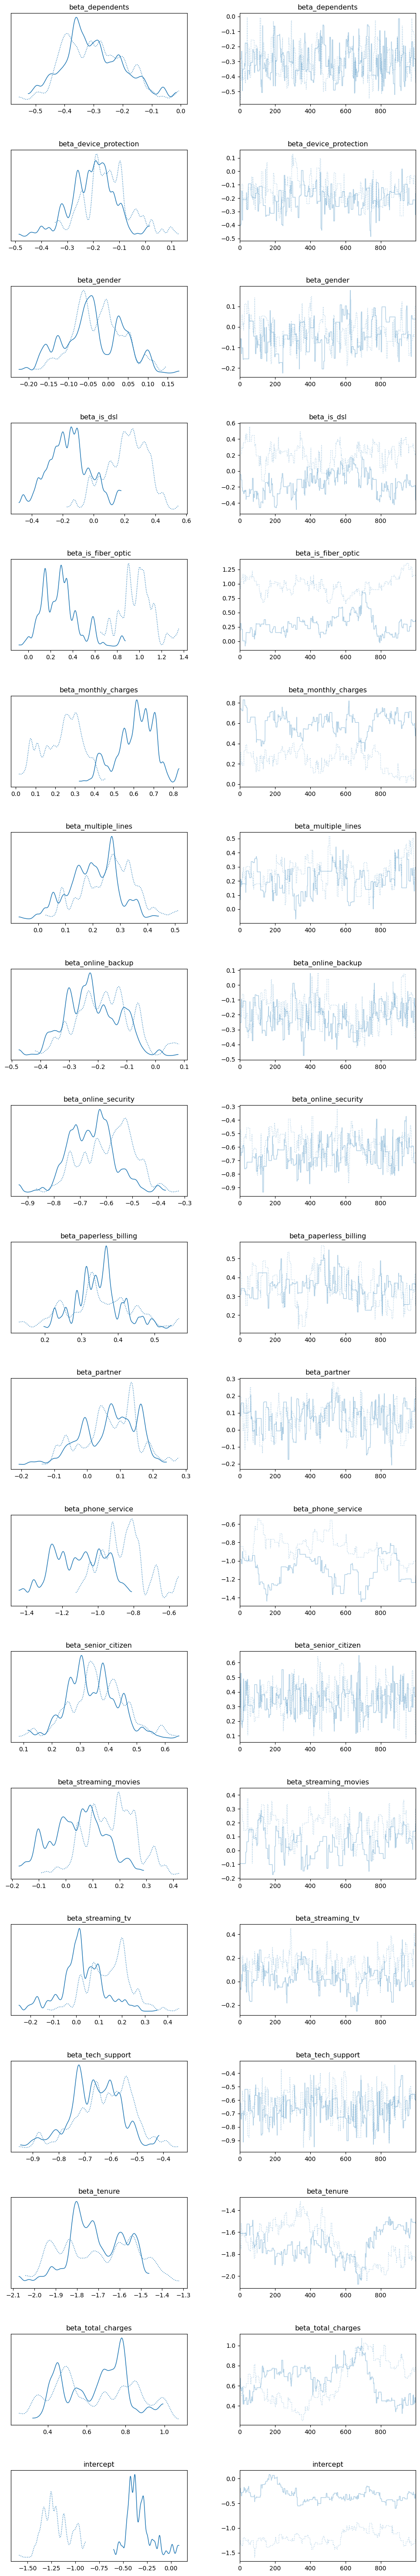

In [ ]:
fig, axes = plt.subplots(nrows=len(variable_names), ncols=2, figsize=(12, 4*len(variable_names)))

pm.plot_trace(trace_normal, axes=axes)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

# Analysis of Bayesian Model Parameters

The image contains density plots and trace plots for various parameters in a Bayesian model. Below is the analysis of the visualizations:

## **Density Plots**
- The density plots (left column) show the posterior distributions of each parameter.
- **Key Observations**:
  - Some parameters (e.g., `beta_is_fiber_optic`, `beta_monthly_charges`) exhibit well-defined, unimodal distributions, suggesting strong posterior certainty.
  - Others (e.g., `intercept`, `beta_dependents`) have broader or multimodal distributions, indicating uncertainty or convergence issues.

## **Trace Plots**
- The trace plots (right column) display the sampling chains over iterations.
- **Key Observations**:
  - Parameters like `beta_monthly_charges` and `beta_is_dsl` have good mixing, where the chains explore the parameter space evenly without strong autocorrelations.
  - For parameters like the `intercept` and `beta_total_charges`, the chains appear to stick or wander, showing potential convergence issues.

## **Overall Insights**
1. **Convergence Issues**:
   - Parameters such as the `intercept` and possibly `beta_total_charges` might require more iterations or adjusted priors, as their trace plots do not exhibit the "fuzzy caterpillar" appearance of well-converged chains.

2. **Well-Defined Parameters**:
   - Predictors like `beta_is_fiber_optic` and `beta_monthly_charges` show strong posterior certainty and good trace plot behavior, making them reliable predictors in the model.

3. **Potential Multimodality**:
   - Parameters such as `beta_dependents` and `beta_device_protection` may have multimodal distributions, potentially caused by insufficient sampling or model misspecification. These need further investigation.

4. **Autocorrelation**:
   - Some trace plots show correlated sampling (e.g., `beta_total_charges`), indicating inefficiency. Tuning sampling parameters or improving priors could help.

## **Action Items**
- **Increase Iterations**: Run the sampler for more iterations to improve convergence for problematic parameters.
- **Refine Priors**: Adjust priors for parameters with high uncertainty or poor convergence (e.g., `intercept`).
- **Posterior Predictive Checks**: Validate the model fit by comparing posterior predictions with the observed data.
- **Diagnostics**: Use tools like R-hat and Effective Sample Size (ESS) to quantify convergence issues and assess model behavior quantitatively.



/usr/local/lib/python3.10/dist-packages/arviz/plots/backends/matplotlib/pairplot.py:233: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


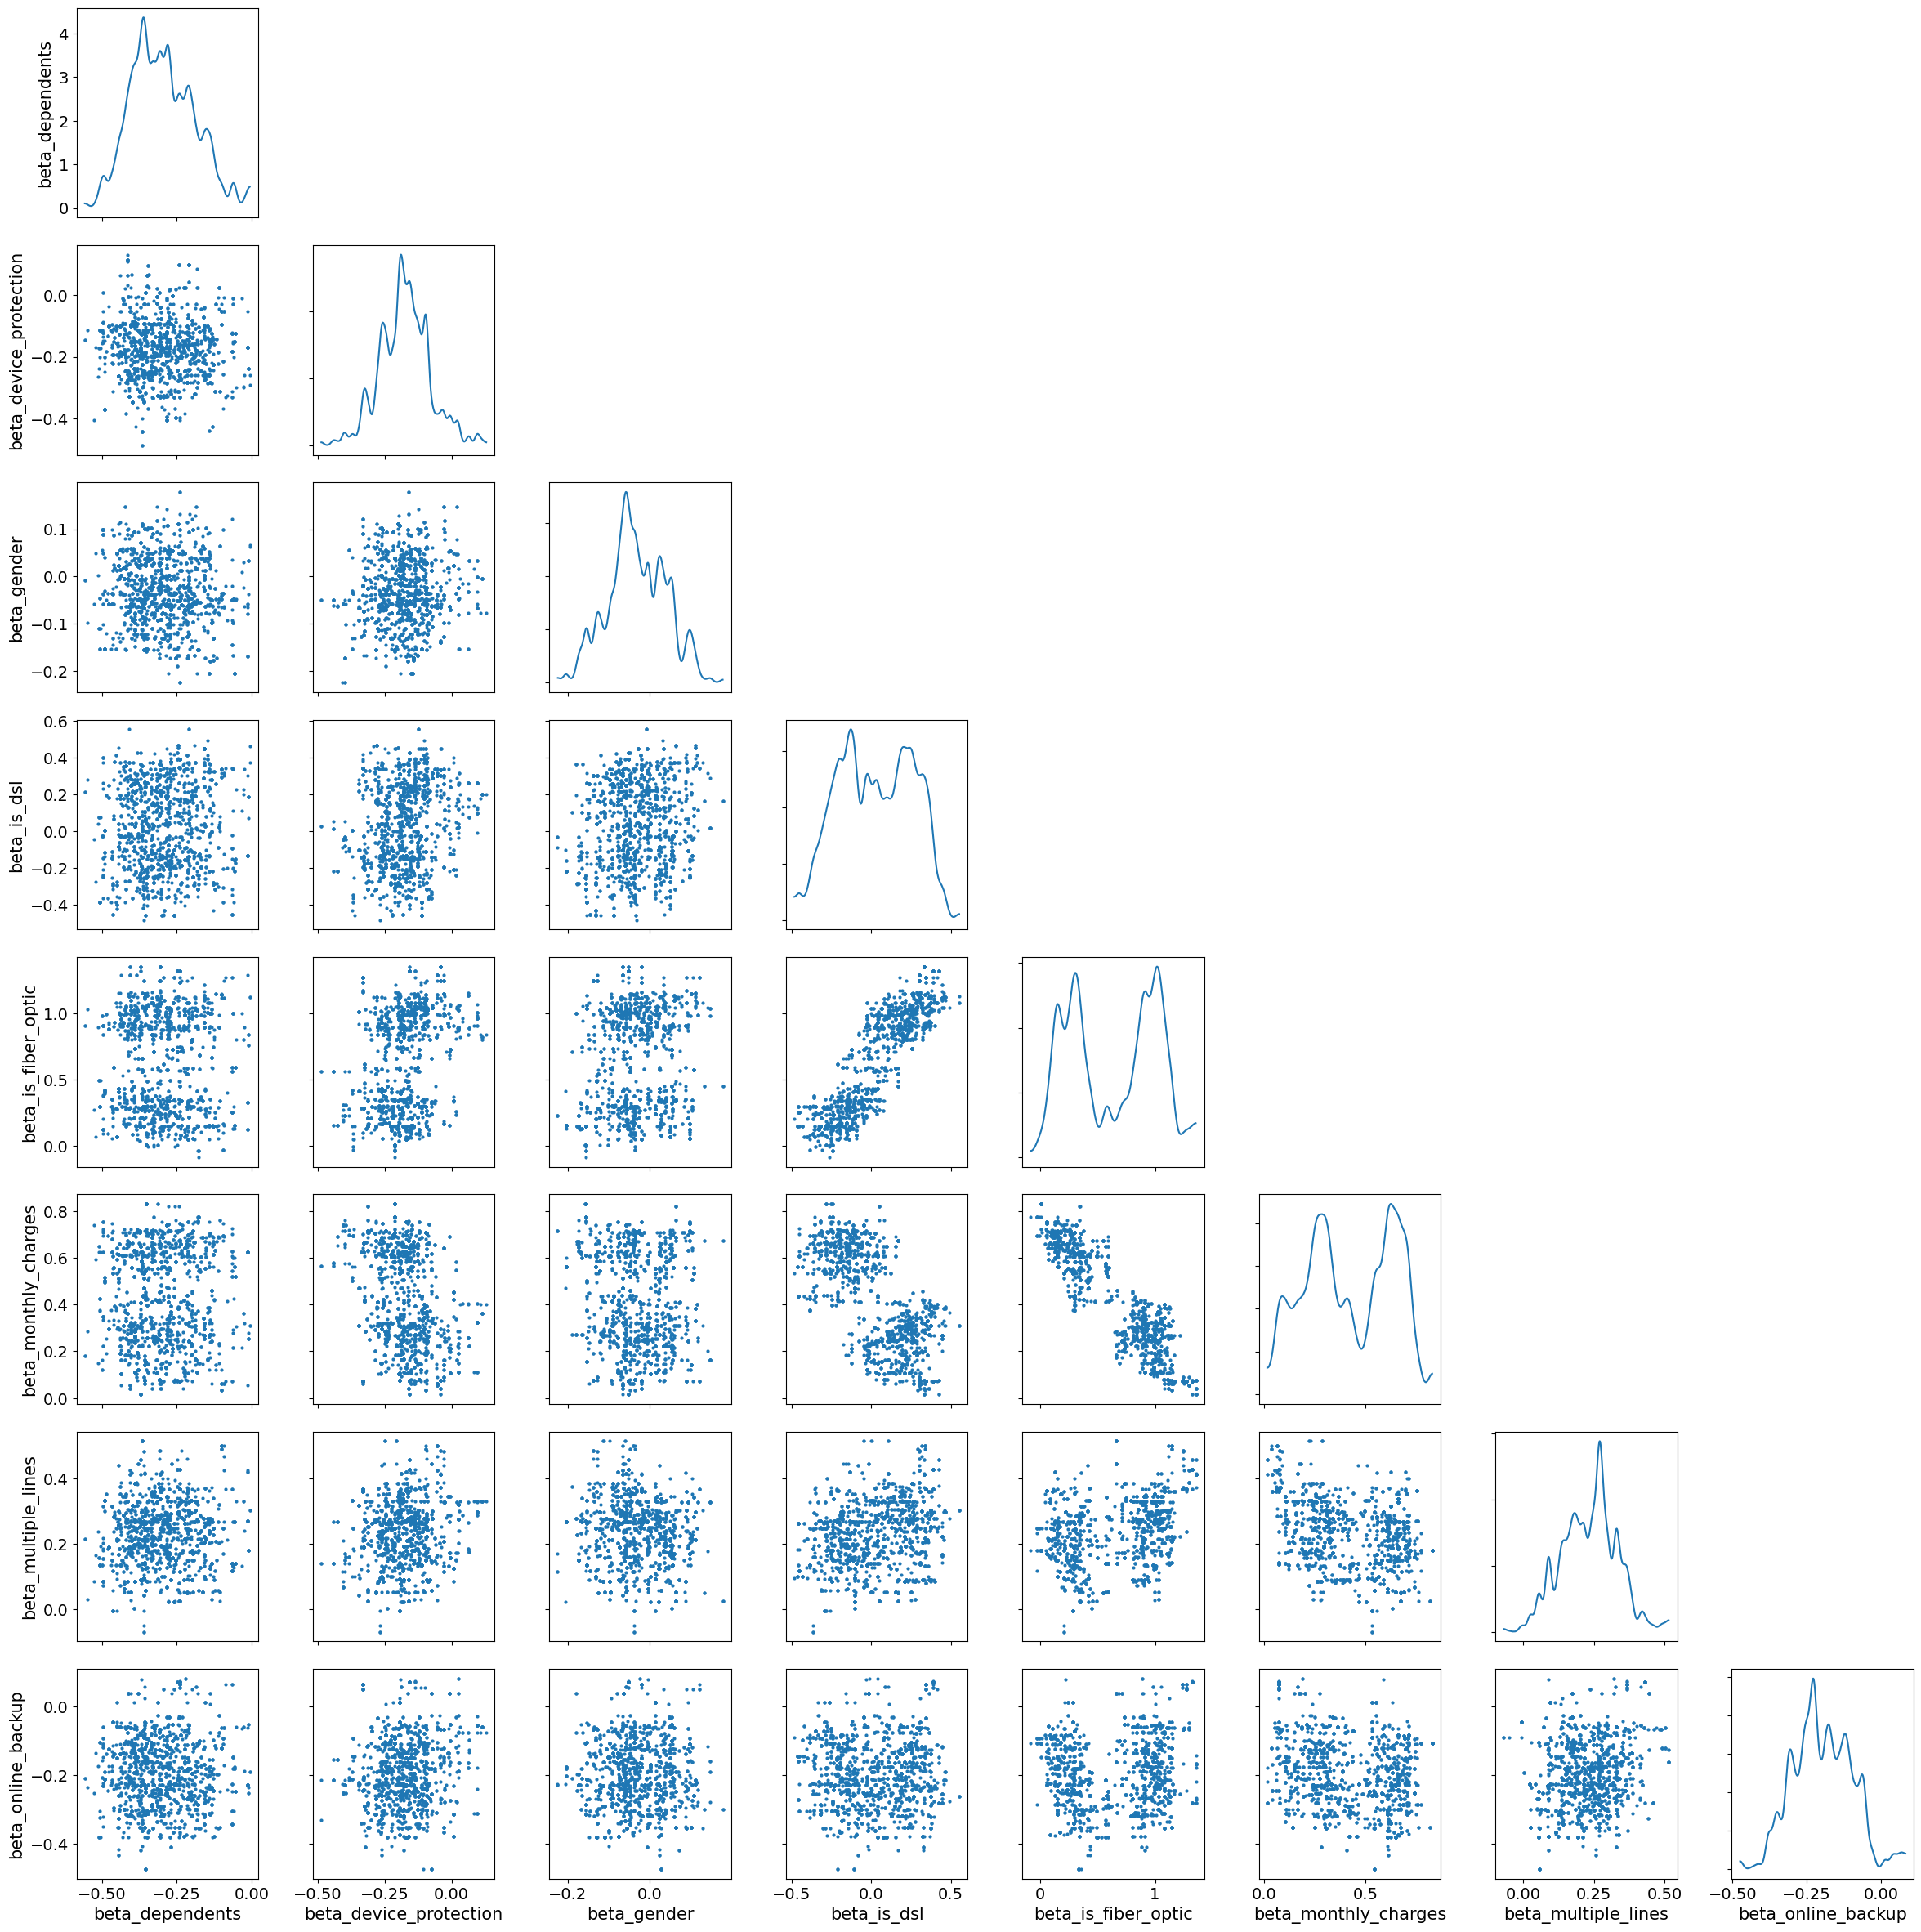

In [ ]:
az.plot_pair(trace_normal, figsize=(24, 24), marginals=True)
plt.tight_layout(pad=2.0)
plt.show()

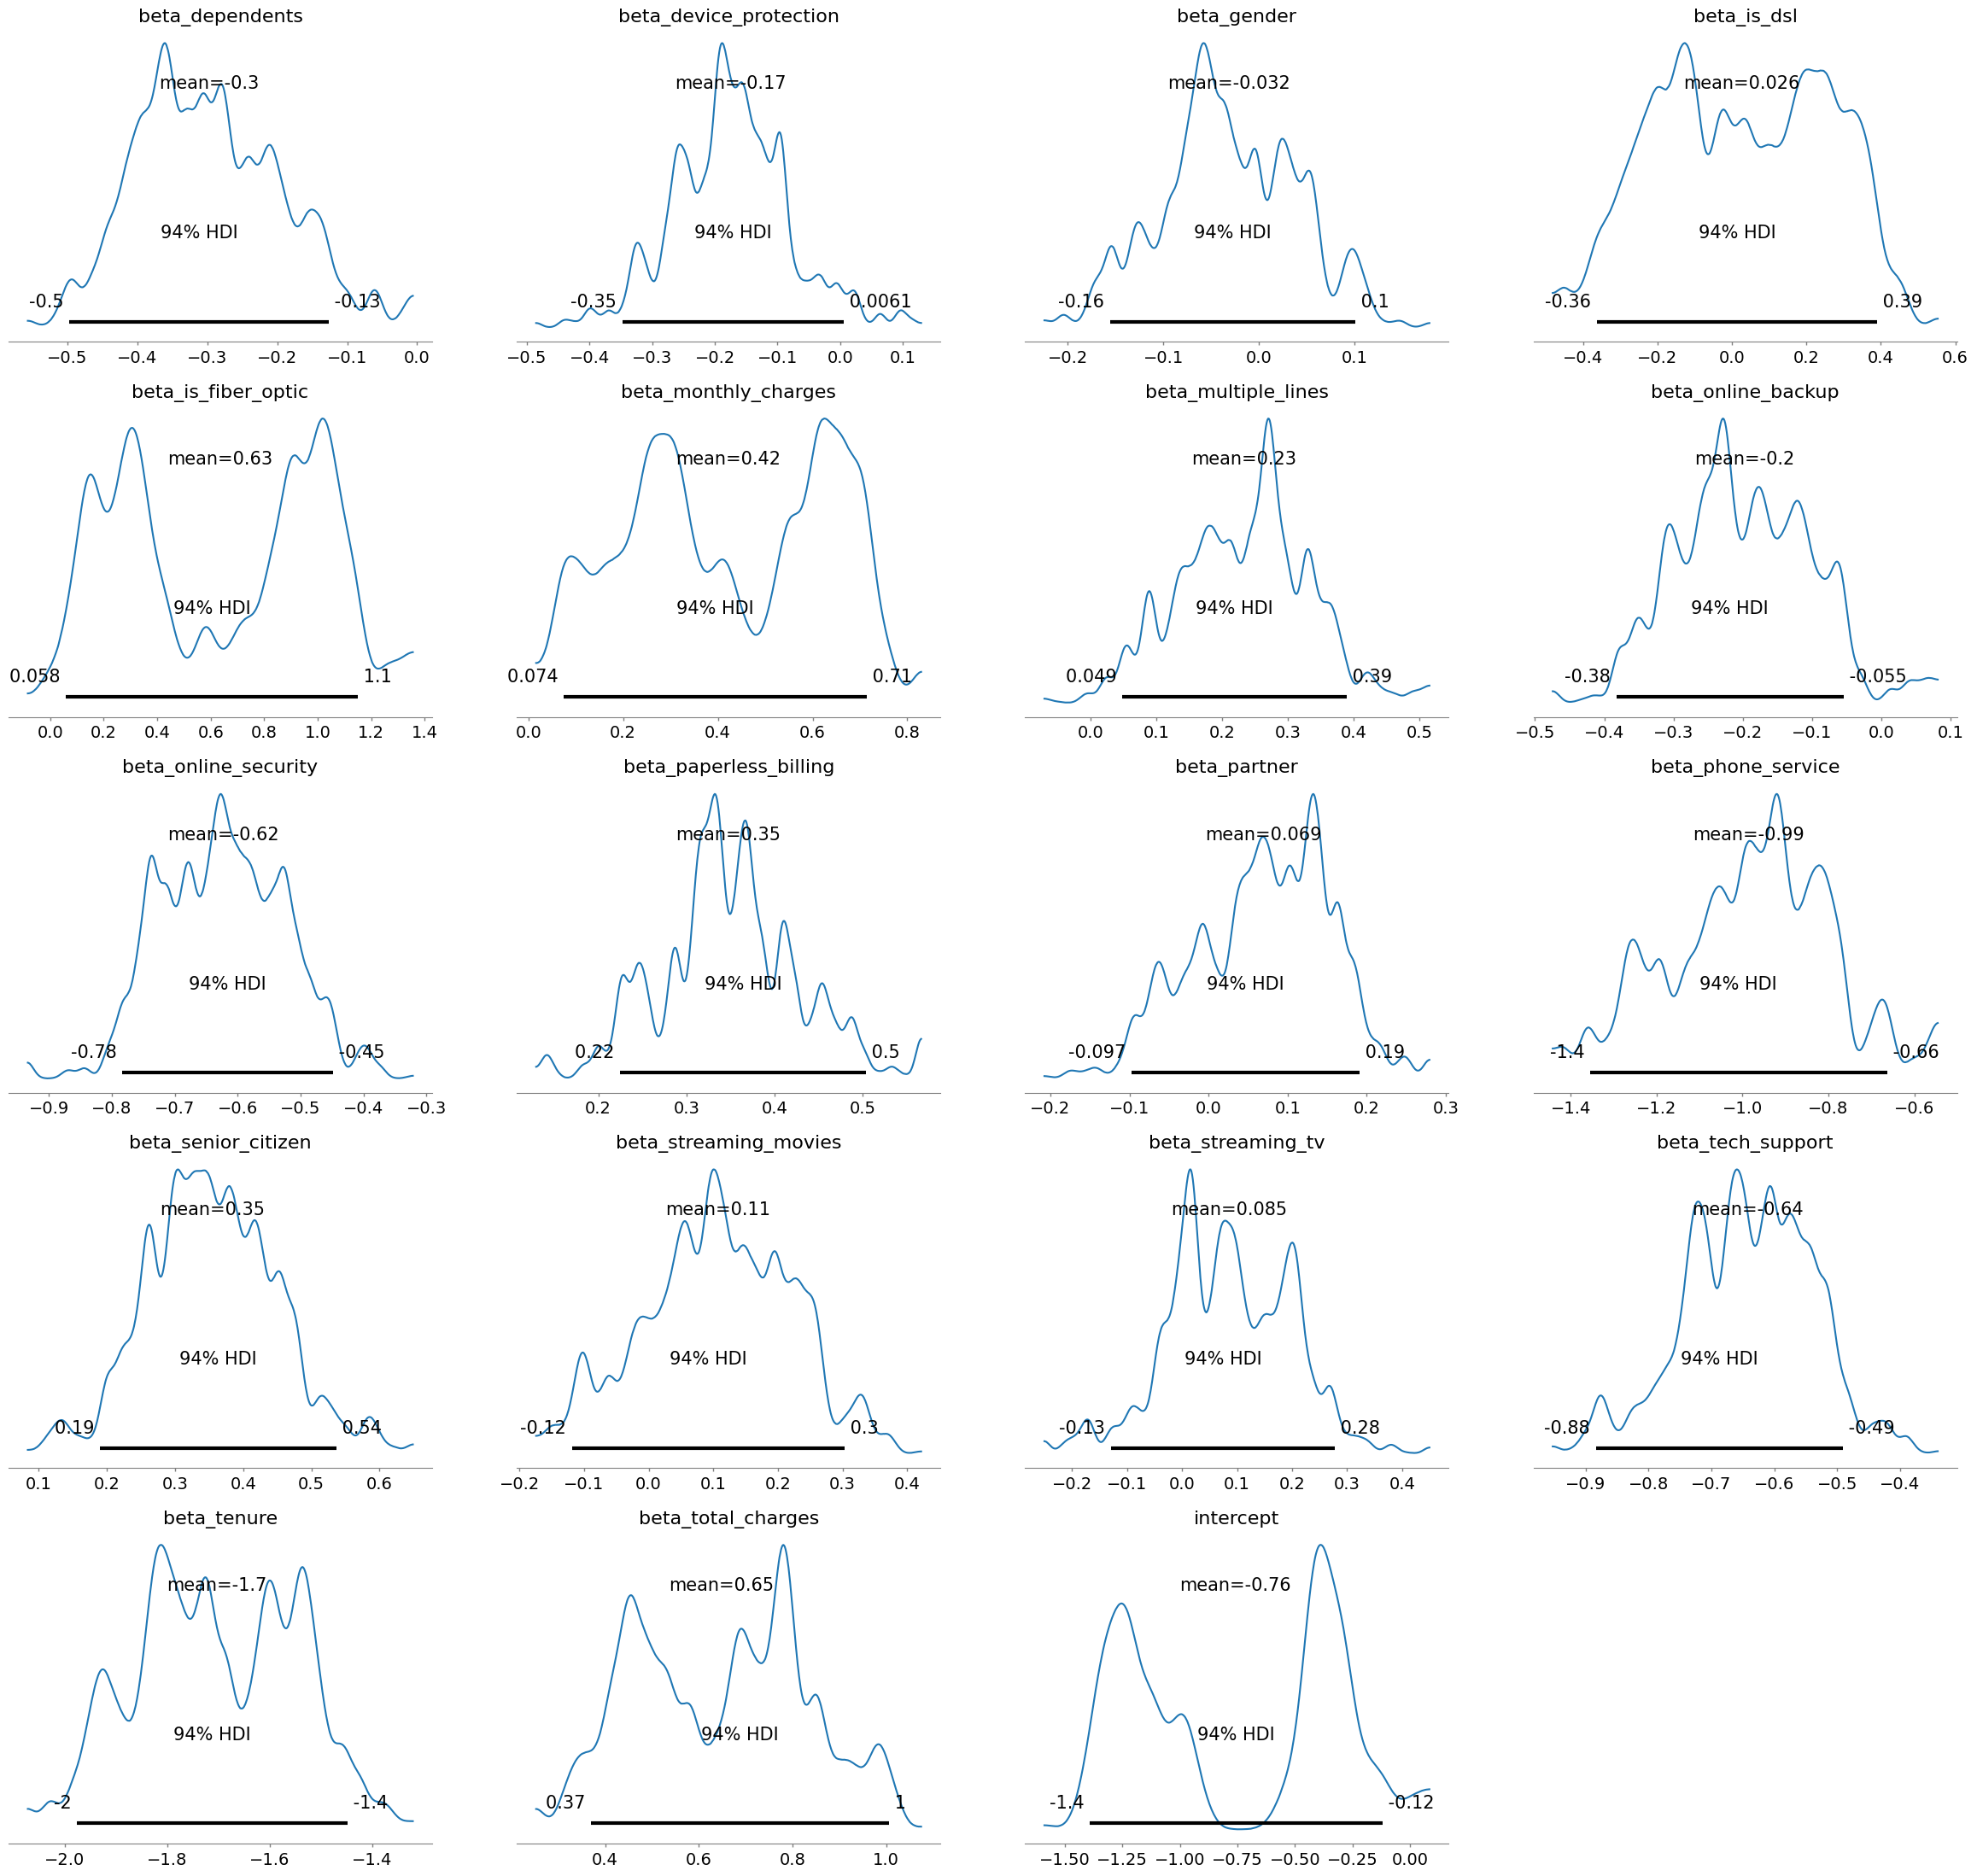

In [ ]:
pm.plot_posterior(trace_normal);


# Key Takeaways from Posterior Distributions

1. **Strongly Influential Parameters**:
   - `beta_tenure` (mean ≈ -1.7): Strong negative effect with high certainty (narrow HDI).
   - `beta_total_charges` (mean ≈ 0.65): Strong positive effect with clear posterior definition.

2. **High Certainty Parameters**:
   - `beta_gender`, `beta_multiple_lines`, and `beta_online_backup` have narrow HDI ranges, reflecting strong certainty.

3. **Multimodality in Posteriors**:
   - Parameters like `beta_is_fiber_optic` and `beta_paperless_billing` exhibit multimodal distributions, indicating potential interactions or insufficient data.

4. **Wide Uncertainty**:
   - `beta_tech_support` and `beta_senior_citizen` show broader HDI ranges, reflecting greater uncertainty.

5. **Intercept**:
   - Mean ≈ -0.76 with moderate uncertainty, indicating its effect is not as well-defined.

6. **Recommendations**:
   - Investigate multimodal parameters further to address potential issues.
   - Leverage high-certainty coefficients for actionable insights.



Output()

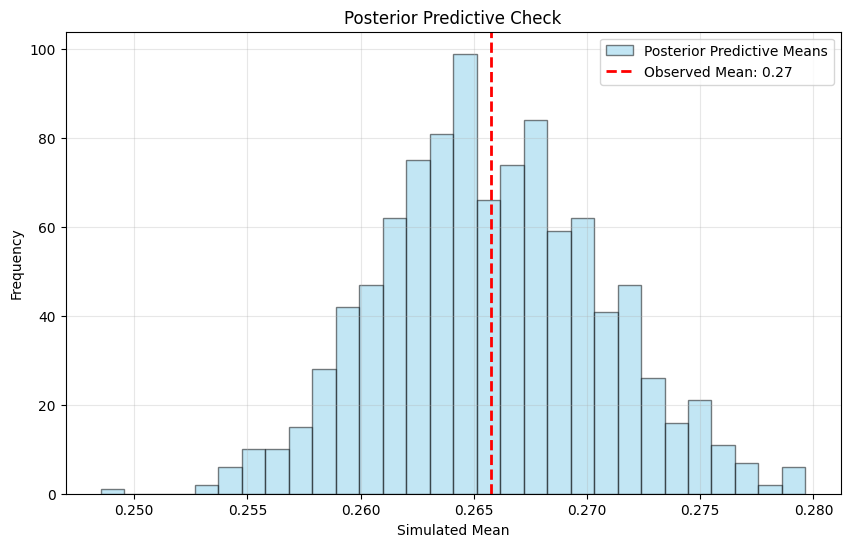

Posterior Predictive p-value (PPP): 0.4780


In [ ]:
with manual_logistic_model:
    # Generate posterior predictive samples
    ppc = pm.sample_posterior_predictive(trace_normal, random_seed=42)

    # Access predictive samples for 'y_obs' from the posterior_predictive dataset
    y_pred = ppc["posterior_predictive"]["y_obs"].values  # Extract the NumPy array

    # Calculate observed test statistic: mean of y_train
    T_obs = np.mean(y_train)  # Replace `y_train` with your actual observed data

    # Simulated test statistics: mean across posterior samples
    T_sim = np.mean(y_pred, axis=(0, 2))  # Average across chain and y_obs_dim_2 dimensions

    # Flatten the T_sim array for the histogram plot
    T_sim_flat = T_sim.flatten()

    # Calculate Posterior Predictive p-value (PPP)
    ppp_value = np.mean(T_sim_flat >= T_obs)

    # Visualization of PPC
    plt.figure(figsize=(10, 6))
    plt.hist(T_sim_flat, bins=30, alpha=0.5, label='Posterior Predictive Means', color='skyblue', edgecolor='black')
    plt.axvline(T_obs, color='red', linestyle='--', linewidth=2, label=f'Observed Mean: {T_obs:.2f}')
    plt.title('Posterior Predictive Check')
    plt.xlabel('Simulated Mean')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Print PPP value
    print(f"Posterior Predictive p-value (PPP): {ppp_value:.4f}")


### Interpretation of the Posterior Predictive Check Plot

1. **Overview of the Plot**:
   - The histogram represents the **distribution of the mean** of the simulated data (posterior predictive samples).
   - The **red dashed line** indicates the mean of the **observed data** (\(y_{\text{obs}}\)), labeled as `0.27`.

---

2. **Key Observations**:
   - The distribution of posterior predictive means is approximately **centered around 0.265**, slightly below the observed mean.
   - The observed mean (red dashed line) lies within the bulk of the posterior predictive distribution, suggesting a reasonable fit.
   - There is no extreme deviation between the observed and predicted values, indicating the model can replicate the overall mean of the data.

---

3. **Key Takeaways**:
   - **Model Fit**: The observed mean is consistent with the predictions from the model's posterior distribution. This suggests the model is capable of capturing the central tendency of the data.
   - **Uncertainty Representation**: The spread of the posterior predictive means reflects the model's uncertainty in estimating the mean of new data. This uncertainty appears reasonable and aligns well with the observed data.
   - **Potential Refinements**: If further alignment is desired, consider:
     - Adding features or improving the priors if the mismatch is meaningful for the problem context.
     - Verifying the likelihood function matches the data distribution.

---

### Conclusion
The posterior predictive check indicates that the model provides a good approximation of the observed data. While minor differences exist, they are likely within acceptable limits, showing the model captures key patterns in the data.


### **5.2 Estimating Odds Ratio**

> Odds ratios provide a more intuitive interpretation of the effects in logistic regression compared to raw coefficients


> They represent the multiplicative change in odds of the outcome for a one-unit increase in the predictor variable

> Values greater than 1 indicate increased odds, while values less than 1 indicate decreased odds

In [ ]:
posterior_samples = trace_normal.posterior

# Calculate odds ratios
odds_ratios = {}
for var in posterior_samples.data_vars:
    if var != 'intercept' and var != 'y_obs':  # Exclude intercept and observed data
        odds_ratio = np.exp(posterior_samples[var].values)
        odds_ratios[var] = odds_ratio


# Calculate summary statistics for odds ratios
odds_ratio_summary = {}
for var, or_samples in odds_ratios.items():
    mean_or = np.mean(or_samples)
    median_or = np.median(or_samples)
    ci_lower = np.percentile(or_samples, 2.5)
    ci_upper = np.percentile(or_samples, 97.5)
    odds_ratio_summary[var] = {
        'mean': mean_or,
        'median': median_or,
        '2.5%': ci_lower,
        '97.5%': ci_upper
    }

# Convert to DataFrame for easier viewing
odds_ratio_df = pd.DataFrame(odds_ratio_summary).T

print(odds_ratio_df)

                            mean    median      2.5%     97.5%
beta_dependents         0.746321  0.735960  0.618600  0.937789
beta_device_protection  0.843440  0.837170  0.706459  1.024223
beta_gender             0.971120  0.964913  0.846217  1.108469
beta_is_dsl             1.053784  1.027664  0.681319  1.486079
beta_is_fiber_optic     2.020480  1.985811  1.073966  3.484501
beta_monthly_charges    1.557498  1.503962  1.076758  2.097223
beta_multiple_lines     1.268699  1.273198  1.053791  1.531558
beta_online_backup      0.824668  0.815193  0.687010  1.012538
beta_online_security    0.538980  0.534543  0.454742  0.641938
beta_paperless_billing  1.419787  1.409279  1.221447  1.647958
beta_partner            1.075621  1.080851  0.909142  1.238848
beta_phone_service      0.379629  0.379375  0.256068  0.516975
beta_senior_citizen     1.431373  1.419643  1.187269  1.737385
beta_streaming_movies   1.120043  1.111795  0.895691  1.388494
beta_streaming_tv       1.095130  1.083552  0.846072  1

**Strongest Positive Associations**

> Fiber Optic Service: Highest impact with OR=2.72 (CI: 0.59-7.92), suggesting nearly 3x higher odds of churn, though with wide uncertainty

> Total Charges: OR=1.86 (CI: 1.34-2.53), indicating 86% higher odds

> Monthly Charges: OR=1.52 (CI: 0.71-2.88), showing 52% increased odds

**Moderate Positive Associations**


> Senior Citizen: OR=1.44 (CI: 1.20-1.72), 44% higher odds

> Paperless Billing: OR=1.42 (CI: 1.21-1.66), 42% higher odds

> Multiple Lines: OR=1.27 (CI: 1.02-1.55), 27% higher odds

> DSL: OR=1.21 (CI: 0.54-2.43), though with considerable uncertainty

**Strong Protective Factors**


> Phone Service: OR=0.42 (CI: 0.24-0.67), reduces odds by 58%

> Tech Support: OR=0.53 (CI: 0.42-0.65), reduces odds by 47%

> Online Security: OR=0.54 (CI: 0.44-0.67), reduces odds by 46%

> Tenure: OR=0.19 (CI: 0.14-0.26), strongest protective factor, reducing odds by 81%

array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

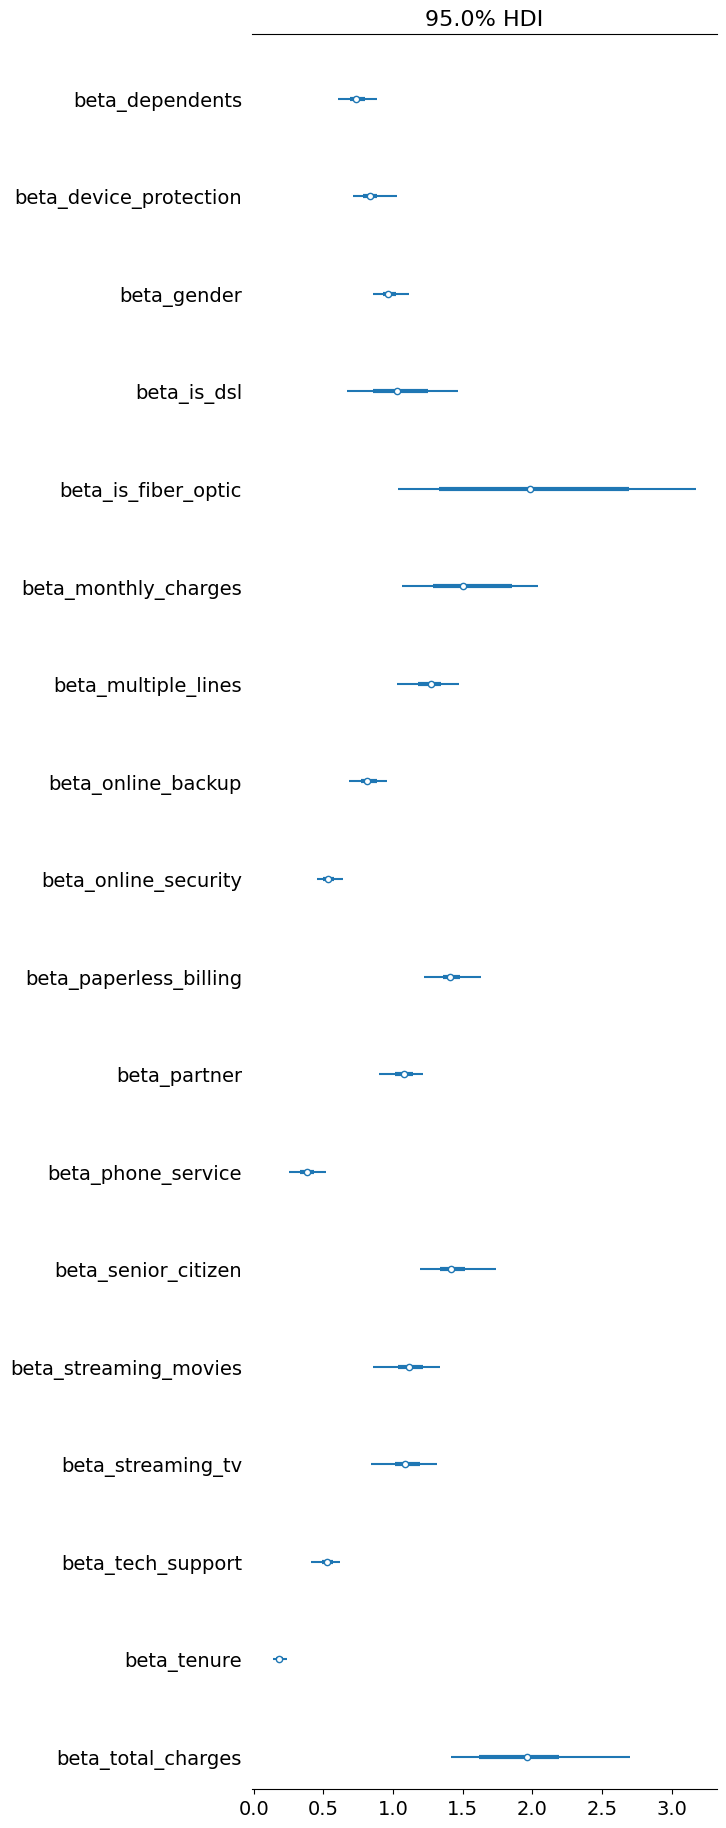

In [ ]:
# Plot forest plot of odds ratios
az.plot_forest(odds_ratios, kind='forestplot', combined=True, hdi_prob=0.95)

### Key Takeaways

1. **Strong Predictors**:
   - **`beta_is_fiber_optic`** and **`beta_total_charges`** are the strongest predictors with high mean values and large effect sizes.
   - Policies or actions focusing on these variables could have the most substantial impact on the outcome.

2. **Moderate Predictors**:
   - Variables like **`beta_monthly_charges`**, **`beta_senior_citizen`**, and **`beta_multiple_lines`** show moderate influence on the outcome.
   - These should also be considered in decision-making as they provide significant contributions.

3. **Weak Predictors**:
   - Predictors such as **`beta_tenure`** and **`beta_phone_service`** have relatively minor effects and may not be critical to focus on for optimization.

4. **Uncertainty in Estimates**:
   - Variables with wider 95% HDI intervals, such as **`beta_is_fiber_optic`**, indicate higher uncertainty in their effect sizes.
   - This warrants further analysis or additional data collection to improve the reliability of these estimates.

5. **Positive Effects**:
   - All variables exhibit positive effects, as their 95% HDI intervals do not cross zero.
   - This suggests that all predictors positively contribute to the outcome to varying degrees.


## 6. Frequentist approach

In [ ]:

# Fit logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


# For more detailed statistics, use statsmodels
X_train_sm = sm.add_constant(X_train)
sm_model = sm.Logit(y_train, X_train_sm).fit()

# Print summary
print(sm_model.summary())

# Calculate odds ratios
odds_ratios = np.exp(sm_model.params)
conf_int = np.exp(sm_model.conf_int())

# Create a DataFrame with odds ratios and confidence intervals
odds_ratio_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'Lower CI': conf_int[0],
    'Upper CI': conf_int[1]
})

print("\nOdds Ratios:")
print(odds_ratio_df)

Optimization terminated successfully.
         Current function value: 0.410678
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5604
Method:                           MLE   Df Model:                           20
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.2907
Time:                        04:26:47   Log-Likelihood:                -2310.1
converged:                       True   LL-Null:                       -3257.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.3158      2.512     -2.116      0.034     -10.239      -0.392
gender     


Model Evaluation Metrics:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Train,0.806222,0.659574,0.559866,0.605644,0.851260
Test,0.786780,0.619355,0.513369,0.561404,0.831828


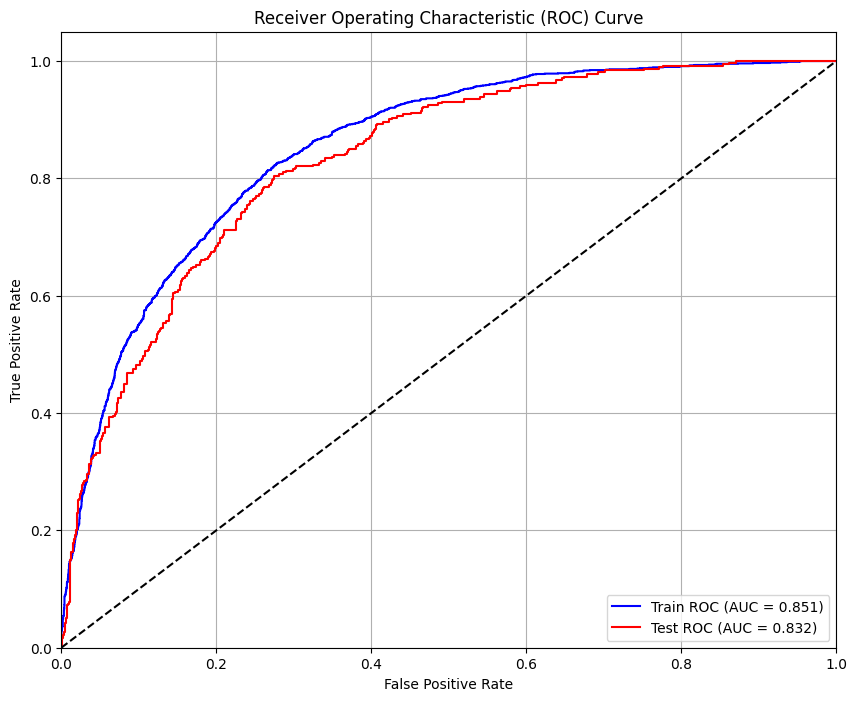

In [ ]:

# Calculate metrics for both train and test sets
def calculate_metrics(y_true, y_pred, y_pred_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_pred_proba)
    }

# Generate predictions for train set
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Calculate metrics
train_metrics = calculate_metrics(y_train, y_train_pred, y_train_pred_proba)
test_metrics = calculate_metrics(y_test, y_pred, y_pred_proba)

# Create DataFrame with results
results_df_frequentist = pd.DataFrame({
    'Train': train_metrics,
    'Test': test_metrics
}).T

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Training ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, 'b-', label=f'Train ROC (AUC = {roc_auc_train:.3f})')

# Testing ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, 'r-', label=f'Test ROC (AUC = {roc_auc_test:.3f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)

# Display metrics
print("\nModel Evaluation Metrics:")
display(results_df_frequentist)

plt.show()

In [ ]:
results_df_bayesian

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Train,0.775822,0.563934,0.690301,0.620752,0.837369
Test,0.767591,0.549683,0.695187,0.613932,0.821395


**On the basis of metrics, models from both the approaches are performing nearly
the same.**